In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from scipy.integrate import odeint
from scipy.interpolate import interp1d

nuc_to_astro = 0.8629*1e-6

def read_eos(pathname):
    """
    Read in equation of state information from tabulated format.
    This is written assuming the following order:
    0: number density [fm-3]
    1: pressure [Mev fm-3]
    2: energy density [Mev fm-3]
    Conversion factor: 1 [Mev fm-3] = 0.89629x10^-6 [Msol c2 km-3]
    """
    
    src = np.loadtxt(pathname, comments='#')
    P, e = src[:,1], src[:,2]
    p, e = P*nuc_to_astro, e*nuc_to_astro
    return (p,e)
    
def make_derivs_func(pathname):
    pdata, edata = read_eos(pathname)
    eos = interp1d(pdata,edata)
    
    
    def derivs(p,y):
        """
        e: e_of_P function
        """
        e = eos(p)
        x,m = y
        dxdp = -2*x*(np.sqrt(x)-(2*m))/((e+p)*(m+(4*np.pi*p*x**(3/2))))
        dmdp = -((4*np.pi*e*x**(3/2))*(np.sqrt(x)-2*m))/((e+p)*(m+(4*np.pi*p*x**(3/2))))
        return dxdp,dmdp
    
    return derivs

def solve_tov(p_init,pathname):
    """
    Inputs:
    - p,e: functions for EOS
    - p_init: Value of central pressure (start with 0.8*nuc_to_astro)
    Initial conditions: P(0) = P[index]
    """
    
    derivs = make_derivs_func(pathname)

    p_range = [p_init,1e-14]
    y0 = [1e-14,1e-14]
    sol = solve_ivp(derivs, p_range, y0, dense_output=True, 
                    rtol=1e-7, atol=1e-7, max_step=1e-8)
    return sol

In [2]:
import traceback

path = 'Nucleonic_EOS.dat'
massradius = []
P_vals = np.arange(5,2000,20)
for P in P_vals:
    print(P)
    try:
        init_p = P*nuc_to_astro
        sol = solve_tov(init_p, path)
        massradius.append([np.sqrt(sol.y[0][-1]), sol.y[1][-1]])
    except:
        traceback.print_exc()
massradius = np.array(massradius)

5


/tmp/ipykernel_1496719/3391626599.py:35: RuntimeWarning: invalid value encountered in sqrt
  dxdp = -2*x*(np.sqrt(x)-(2*m))/((e+p)*(m+(4*np.pi*p*x**(3/2))))
/tmp/ipykernel_1496719/3391626599.py:35: RuntimeWarning: invalid value encountered in double_scalars
  dxdp = -2*x*(np.sqrt(x)-(2*m))/((e+p)*(m+(4*np.pi*p*x**(3/2))))
/tmp/ipykernel_1496719/3391626599.py:36: RuntimeWarning: invalid value encountered in double_scalars
  dmdp = -((4*np.pi*e*x**(3/2))*(np.sqrt(x)-2*m))/((e+p)*(m+(4*np.pi*p*x**(3/2))))
/tmp/ipykernel_1496719/3391626599.py:36: RuntimeWarning: invalid value encountered in sqrt
  dmdp = -((4*np.pi*e*x**(3/2))*(np.sqrt(x)-2*m))/((e+p)*(m+(4*np.pi*p*x**(3/2))))


25
45
65
85
105
125
145
165
185
205
225
245
265
285
305
325
345
365
385
405
425
445
465
485
505
525
545
565
585
605
625
645
665
685
705
725
745
765
785
805
825
845
865
885
905
925
945
965
985
1005
1025
1045
1065
1085
1105
1125
1145
1165
1185
1205
1225
1245
1265
1285
1305
1325
1345
1365
1385
1405
1425
1445
1465
1485
1505
1525
1545
1565
1585
1605
1625
1645
1665
1685
1705
1725
1745
1765
1785
1805
1825
1845
1865
1885
1905
1925
1945
1965
1985


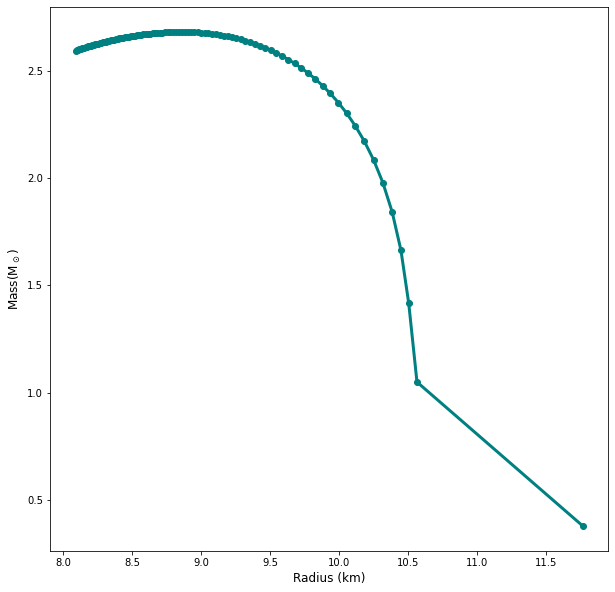

In [6]:
length_to_mass = (3e5)**2/(4.3e-3)
plt.figure(figsize=(10,10))
mass, radius = massradius[:,1], massradius[:,0]
#plt.plot(radius, mass,linewidth=3, color='teal')
plt.plot(radius/1.4, mass/1.4,linewidth=3, color='teal')
plt.scatter([radius/1.4], [mass/1.4], color='teal')
plt.xlabel('Radius (km)',fontsize='large'), plt.ylabel(r'$\rm{Mass (M_\odot)}$',fontsize='large')
plt.savefig('second_pass_scatter.png', facecolor='w', bbox_inches='tight')

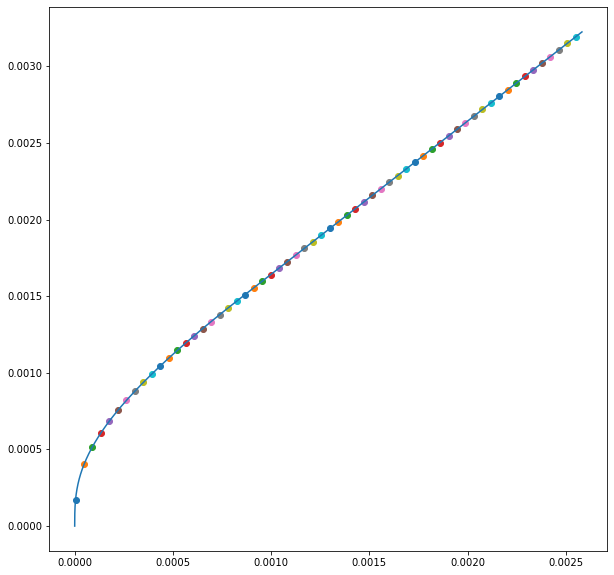

In [45]:
plt.figure(figsize=(10,10))
pdata,edata = read_eos('Nucleonic_EOS.dat')
plt.plot(pdata,edata)
min(pdata/nuc_to_astro)

interp = interp1d(pdata,edata)
for i in range(5,3000,50):
    plt.scatter([i*nuc_to_astro], [interp(i*nuc_to_astro)])

In [49]:
np.arange(5,2000,20)

array([   5,   25,   45,   65,   85,  105,  125,  145,  165,  185,  205,
        225,  245,  265,  285,  305,  325,  345,  365,  385,  405,  425,
        445,  465,  485,  505,  525,  545,  565,  585,  605,  625,  645,
        665,  685,  705,  725,  745,  765,  785,  805,  825,  845,  865,
        885,  905,  925,  945,  965,  985, 1005, 1025, 1045, 1065, 1085,
       1105, 1125, 1145, 1165, 1185, 1205, 1225, 1245, 1265, 1285, 1305,
       1325, 1345, 1365, 1385, 1405, 1425, 1445, 1465, 1485, 1505, 1525,
       1545, 1565, 1585, 1605, 1625, 1645, 1665, 1685, 1705, 1725, 1745,
       1765, 1785, 1805, 1825, 1845, 1865, 1885, 1905, 1925, 1945, 1965,
       1985, 2005, 2025, 2045, 2065, 2085, 2105, 2125, 2145, 2165, 2185,
       2205, 2225, 2245, 2265, 2285, 2305, 2325, 2345, 2365, 2385, 2405,
       2425, 2445, 2465, 2485, 2505, 2525, 2545, 2565, 2585, 2605, 2625,
       2645, 2665, 2685, 2705, 2725, 2745, 2765, 2785, 2805, 2825, 2845,
       2865, 2885, 2905, 2925, 2945, 2965, 2985])

In [52]:
P

2985